In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define correct data folder
data_folder = "/home/sagemaker-user/ads-508-team/data"

# Load Data with Robust Error Handling
try:
    cardio_df = pd.read_csv(os.path.join(data_folder, "processed_cardio_train.csv"), delimiter=";")
    quitline_df = pd.read_csv(os.path.join(data_folder, "processed_quitline_services.csv"), delimiter=";", on_bad_lines="skip")  # Skip bad lines
    print("Data loaded successfully!")
except Exception as e:
    print(f"Error loading data: {e}")

# -----------------------------
# 1. Check Missing Values
# -----------------------------
plt.figure(figsize=(10, 5))

# Calculate missing values
missing_values = cardio_df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Only show columns with missing data

if not missing_values.empty:
    missing_values.plot(kind='bar', color='red')
    plt.title("Missing Values in Cardio Data")
    plt.ylabel("Count")
    plt.xlabel("Columns")
    plt.show()
else:
    print("No missing values found in Cardio Data.")


Data loaded successfully!
No missing values found in Cardio Data.


<Figure size 1000x500 with 0 Axes>

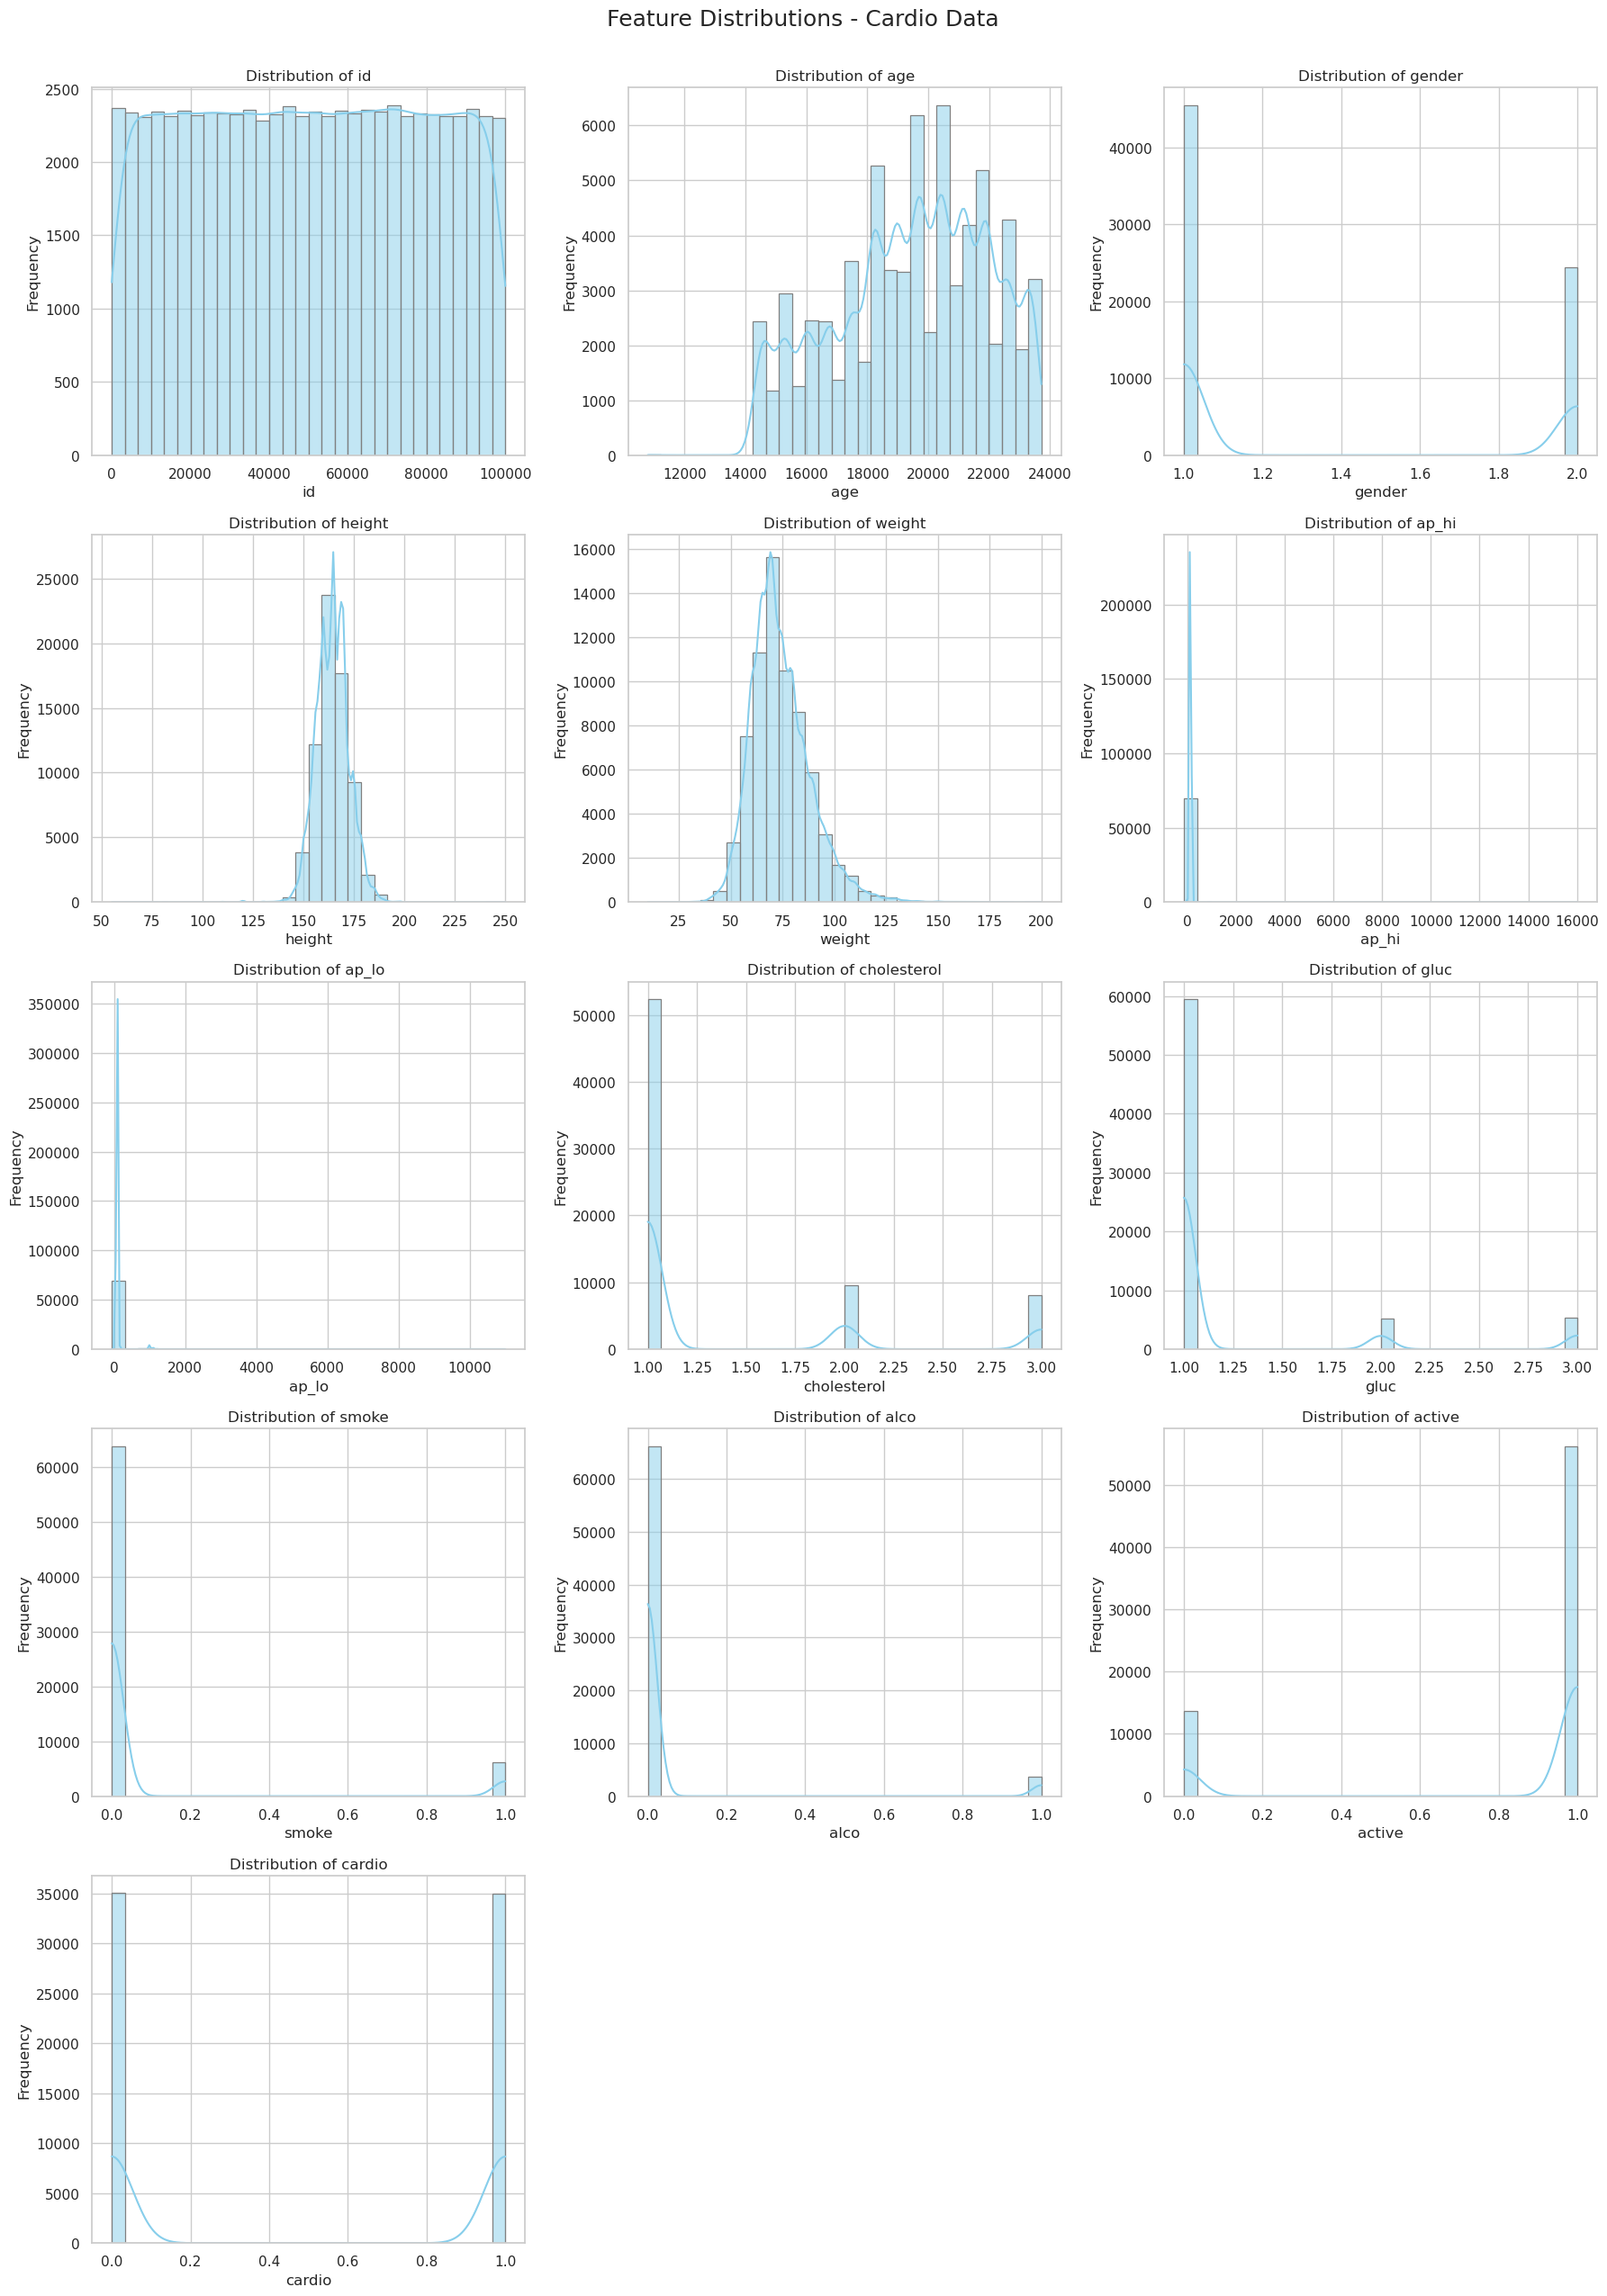

In [13]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Save to root-level images/ directory
save_dir = "../images"
os.makedirs(save_dir, exist_ok=True)

# Filter only numeric columns
numeric_cols = cardio_df.select_dtypes(include=['number'])

# -----------------------------
# 2. Feature Distributions using Seaborn
# -----------------------------
if not numeric_cols.empty:
    num_features = numeric_cols.columns
    n_cols = 3
    n_rows = -(-len(num_features) // n_cols)  # Ceiling division

    plt.figure(figsize=(18, 5 * n_rows))

    for i, col in enumerate(num_features, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(cardio_df[col], bins=30, kde=True, color='skyblue', edgecolor='gray')
        plt.title(f"Distribution of {col}", fontsize=12)
        plt.xlabel(col)
        plt.ylabel("Frequency")

    plt.tight_layout()
    plt.suptitle("Feature Distributions - Cardio Data", fontsize=18, y=1.02)
    
    # Save outside notebooks folder
    plt.savefig(os.path.join(save_dir, "feature_distributions.png"), dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("No numeric columns found in the dataset. Check data types and ingestion process.")


/tmp/ipykernel_407/2604434789.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="Feature", y="Value", data=df_melted, palette="Set2")


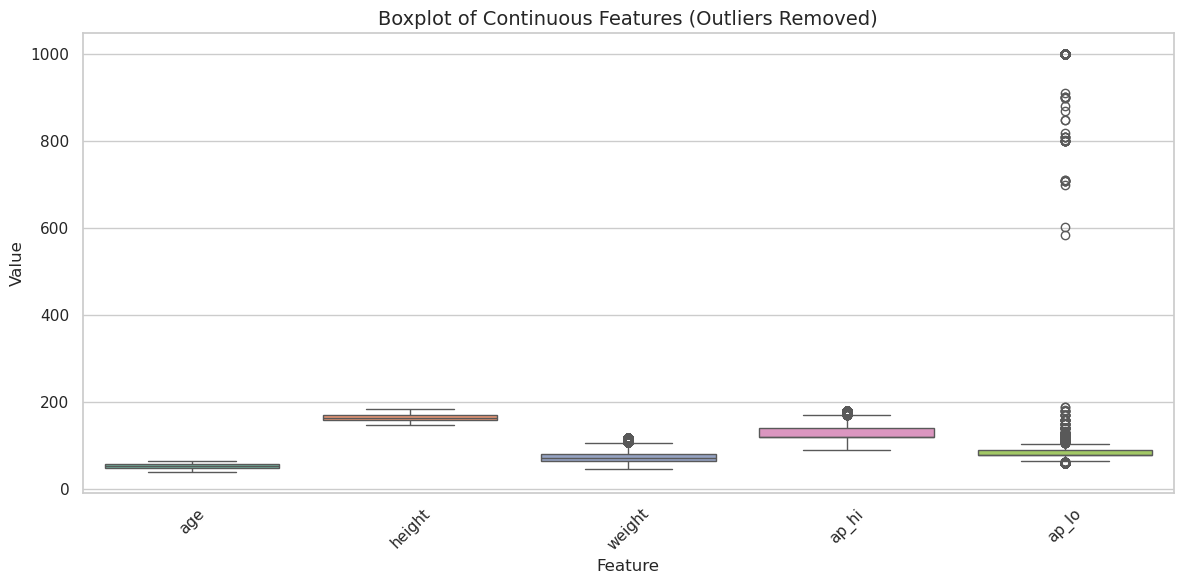

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# 1. Set correct path to save in root-level "images" directory
save_dir = "../images"
os.makedirs(save_dir, exist_ok=True)

# 2. Select continuous features
features = ["age", "height", "weight", "ap_hi", "ap_lo"]

# 3. Copy relevant data
df_plot = cardio_df[features].copy()

# Optional: Convert age to years if in days
if df_plot["age"].max() > 200:
    df_plot["age"] = df_plot["age"] / 365

# 4. Clip outliers (1st to 99th percentile)
for col in features:
    lower = df_plot[col].quantile(0.01)
    upper = df_plot[col].quantile(0.99)
    df_plot[col] = df_plot[col].clip(lower, upper)

# 5. Reshape for seaborn boxplot
df_melted = df_plot.melt(var_name="Feature", value_name="Value")

# 6. Plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x="Feature", y="Value", data=df_melted, palette="Set2")
ax.set_title("Boxplot of Continuous Features (Outliers Removed)", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# 7. Save the plot in the root-level images/ folder
plt.savefig(os.path.join(save_dir, "boxplot_continuous_features_clean.png"), dpi=300)
plt.show()


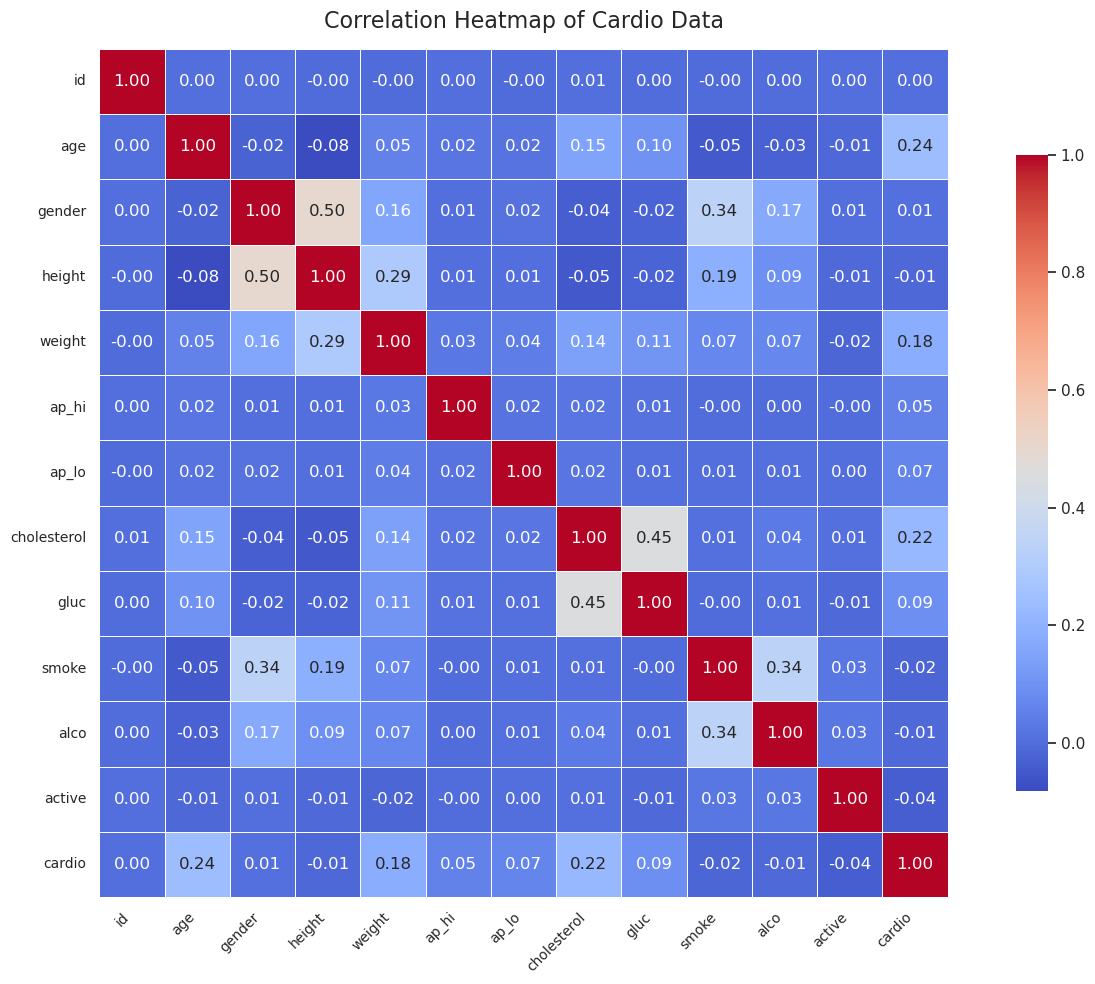

In [14]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Define save directory outside the notebooks folder
save_dir = "../images"
os.makedirs(save_dir, exist_ok=True)

# -----------------------------
# 4. Correlation Heatmap
# -----------------------------
plt.figure(figsize=(14, 10))
corr = cardio_df.corr(numeric_only=True)

sns.heatmap(
    corr, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    linewidths=0.5, 
    cbar_kws={"shrink": 0.75},
    square=True
)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title("Correlation Heatmap of Cardio Data", fontsize=16, pad=15)
plt.tight_layout()

# Save to root-level images folder
plt.savefig(os.path.join(save_dir, "correlation_heatmap.png"), dpi=300, bbox_inches='tight')
plt.show()


/tmp/ipykernel_407/82164597.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cardio_df, x="gender_label", palette="coolwarm")


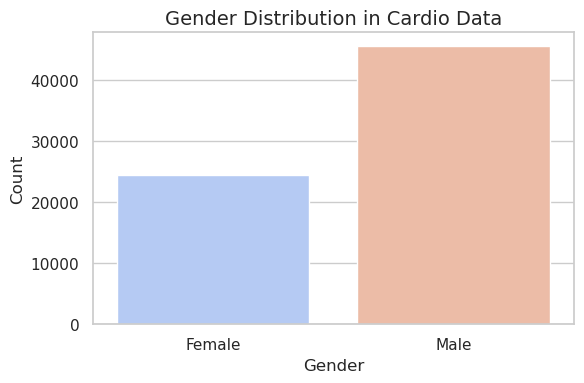

✅ Gender distribution graph saved and displayed!


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Make sure the image folder exists in the root
os.makedirs("../images", exist_ok=True)

# -----------------------------
# 5. Categorical Data Distribution
# -----------------------------
if 'gender' in cardio_df.columns:
    plt.figure(figsize=(6, 4))

    # Map gender values to labels
    gender_labels = {1: 'Male', 2: 'Female'}
    cardio_df['gender_label'] = cardio_df['gender'].map(gender_labels)

    # Plot
    sns.countplot(data=cardio_df, x="gender_label", palette="coolwarm")
    plt.title("Gender Distribution in Cardio Data", fontsize=14)
    plt.xlabel("Gender", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.tight_layout()

    # Save the figure to the root-level images folder
    plt.savefig("../images/gender_distribution.png", dpi=300, bbox_inches='tight')
    plt.show()

print("Gender distribution graph saved and displayed!")
